# Springboard 9 - Capstone

Data Set Information:

The analysis is performed for different sets of input values using the methodology similar to that described in [SchÃ¤fer, Benjamin, et al. 'Taming instabilities in power grid networks by decentralized control.' The European Physical Journal Special Topics 225.3 (2016): 569-582.]. Several input values are kept the same: averaging time: 2 s; coupling strength: 8 s^-2; damping: 0.1 s^-1


Attribute Information:

11 predictive attributes, 1 non-predictive(p1), 2 goal fields: 
1. tau[x]: reaction time of participant (real from the range [0.5,10]s). Tau1 - the value for electricity producer. 
2. p[x]: nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4) 
3. g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). g1 - the value for electricity producer. 
4. stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real) 
5. stabf: the stability label of the system (categorical: stable/unstable) 


Relevant Papers:

Arzamasov, Vadim, Klemens BÃ¶hm, and Patrick Jochem. 'Towards Concise Models of Grid Stability.' Communications, Control, and Computing Technologies for Smart Grids (SmartGridComm), 2018 IEEE International Conference on. IEEE, 2018 
(Section V-A) 



Citation Request:

We thank Dr. Benjamin SchÃ¤fer for helping us with the initial version of the code used for simulations.


In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import sklearn.model_selection

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



df = pd.read_csv("data/Data_for_UCI_named.csv")

df





,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385,stable
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,0.005954,unstable
7,6.953512,1.379125,5.719400,7.870307,3.224495,-0.748998,-1.186517,-1.288980,0.371385,0.633204,0.732741,0.380544,0.016634,unstable
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,-0.038677,stable
9,9.841496,1.413822,9.769856,7.641616,4.727595,-1.991363,-0.857637,-1.878594,0.376356,0.544415,0.792039,0.116263,0.012383,unstable


In [2]:
df.describe()


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


# Logistic Regression

We want to use logistic regression to determine how the independent variables affect grid stability (column stabf, either stable or unstable). Stab and Stabf are dependent variables. The rest, except for p1, are predictive independent variables. According to the UCI repository web pate, p1 is a non-predictive variable, because p1 is defined as the absolute sum of p2, p3, and p4.

In [3]:
import itertools
#https://stackoverflow.com/questions/48624071/run-regression-analysis-on-multiple-subsets-of-pandas-columns-efficiently
df1 = df.copy()
df1 = df1.drop(['p1','stab'],axis=1) #remove p1 variable, which is a non-predictive variable (absolute sum of p2, p3, and p4)
df1.head()
# The function
def StepWise(columns, dependent):
    """ Takes the columns of a pandas dataframe, defines a dependent variable
        and returns all unique combinations of the remaining (independent) variables.

    """

    independent = columns.copy()
    independent.remove(dependent)

    lst1 = []
    lst2 = []
    for i in np.arange(1, len(independent)+1):
        #print(list(itertools.combinations(independent, i)))
        elem = list(itertools.combinations(independent, i))
        lst1.append(elem)
        lst2.extend(elem)

    combosIndependent = [list(elem) for elem in lst2]
    combosAll =  [[dependent, other] for other in combosIndependent]
    return(combosAll)

lExec = StepWise(columns = list(df1), dependent = 'stabf')
print(type(lExec))
print(len(lExec))
print(lExec)


<class 'list'>
2047
[['stabf', ['tau1']], ['stabf', ['tau2']], ['stabf', ['tau3']], ['stabf', ['tau4']], ['stabf', ['p2']], ['stabf', ['p3']], ['stabf', ['p4']], ['stabf', ['g1']], ['stabf', ['g2']], ['stabf', ['g3']], ['stabf', ['g4']], ['stabf', ['tau1', 'tau2']], ['stabf', ['tau1', 'tau3']], ['stabf', ['tau1', 'tau4']], ['stabf', ['tau1', 'p2']], ['stabf', ['tau1', 'p3']], ['stabf', ['tau1', 'p4']], ['stabf', ['tau1', 'g1']], ['stabf', ['tau1', 'g2']], ['stabf', ['tau1', 'g3']], ['stabf', ['tau1', 'g4']], ['stabf', ['tau2', 'tau3']], ['stabf', ['tau2', 'tau4']], ['stabf', ['tau2', 'p2']], ['stabf', ['tau2', 'p3']], ['stabf', ['tau2', 'p4']], ['stabf', ['tau2', 'g1']], ['stabf', ['tau2', 'g2']], ['stabf', ['tau2', 'g3']], ['stabf', ['tau2', 'g4']], ['stabf', ['tau3', 'tau4']], ['stabf', ['tau3', 'p2']], ['stabf', ['tau3', 'p3']], ['stabf', ['tau3', 'p4']], ['stabf', ['tau3', 'g1']], ['stabf', ['tau3', 'g2']], ['stabf', ['tau3', 'g3']], ['stabf', ['tau3', 'g4']], ['stabf', ['tau4', 'p

In [4]:
n=0
allResultsLog = pd.DataFrame(index=range(len(lExec)), columns=['Independent Variables','Accuracy Score'])

for l in lExec:

    X1 = df1[l[1]]
    Xlr, Xtestlr, ylr, ytestlr = train_test_split(df1[l[1]].values, 
                                              (df1.stabf == "stable").values,train_size=0.8,test_size=0.2)
    #must specify both test_size and train_size to avoid receiving "futurewarnings"

    clf = LogisticRegression(solver='lbfgs') #must specify solver to avoid receiving "futurewarnings"
    clf.fit(Xlr,ylr)

    allResultsLog['Independent Variables'][n]=l[1]
    allResultsLog['Accuracy Score'][n]=accuracy_score(clf.predict(Xtestlr), ytestlr)
    n=n+1
    

allResultsLog

,Independent Variables,Accuracy Score
0,[tau1],0.6745
1,[tau2],0.67
2,[tau3],0.6815
3,[tau4],0.676
4,[p2],0.656
5,[p3],0.6475
6,[p4],0.648
7,[g1],0.6415
8,[g2],0.6475
9,[g3],0.6395


In [5]:
allResultsLog1 = allResultsLog.sort_values(by=['Accuracy Score'], ascending=False)
allResultsLog1.head(10)

,Independent Variables,Accuracy Score
2046,"[tau1, tau2, tau3, tau4, p2, p3, p4, g1, g2, g...",0.827
1993,"[tau1, tau2, tau3, tau4, p2, p4, g2, g3, g4]",0.823
2039,"[tau1, tau2, tau3, tau4, p2, p3, g1, g2, g3, g4]",0.817
1994,"[tau1, tau2, tau3, tau4, p2, g1, g2, g3, g4]",0.816
2041,"[tau1, tau2, tau3, tau4, p3, p4, g1, g2, g3, g4]",0.812
2000,"[tau1, tau2, tau3, tau4, p4, g1, g2, g3, g4]",0.811
1645,"[tau1, tau3, tau4, g1, g2, g3, g4]",0.809
1986,"[tau1, tau2, tau3, tau4, p2, p3, g1, g2, g3]",0.8085
1849,"[tau1, tau2, tau3, tau4, g1, g2, g3, g4]",0.808
2040,"[tau1, tau2, tau3, tau4, p2, p4, g1, g2, g3, g4]",0.807


In [6]:
allResultsLog2 = allResultsLog1.head(10)
accuracyresults = [0,0,0,0,0,0,0,0,0,0]
o = 100
for m in range(o):
    n=0
    #print(m)
    for item in allResultsLog2['Independent Variables']:
        #print(item)
        X1 = df1[item]
        Xlr, Xtestlr, ylr, ytestlr = train_test_split(df1[item].values, 
                                                  (df1.stabf == "stable").values,train_size=0.8,test_size=0.2)
        #must specify both test_size and train_size to avoid receiving "futurewarnings"
        
        clf = LogisticRegression(solver='lbfgs') #must specify solver to avoid receiving "futurewarnings"
        clf.fit(Xlr,ylr) 
        accuracyresults[n] = accuracy_score(clf.predict(Xtestlr), ytestlr)+accuracyresults[n]
        #print(accuracyresults[n])
        n=n+1
        
        #print(allResultsLog3['Accuracy Score'][n])#=allResultsLog3['Accuracy Score'][n]+accuracy_score(clf.predict(Xtestlr), ytestlr)
        
averageresults = np.divide(accuracyresults,o)        
print(str(averageresults))



[0.815915 0.798405 0.815275 0.81429  0.81583  0.814865 0.79453  0.794655
 0.81289  0.81472 ]


In [7]:
allResultsLog3 = pd.DataFrame(index=range(len(allResultsLog2)), columns=['Independent Variables','Accuracy Score'])
#allResultsLog3['Independent Variables']=allResultsLog2['Independent Variables']
indVar = list(allResultsLog2['Independent Variables'])
allResultsLog3['Independent Variables']=indVar
for m in range(len(allResultsLog2)):
    #print(accuracyresults[m])
    allResultsLog3['Accuracy Score'][m]=averageresults[m]
    
    

allResultsLog3.sort_values(by='Accuracy Score',ascending=False)


,Independent Variables,Accuracy Score
0,"[tau1, tau2, tau3, tau4, p2, p3, p4, g1, g2, g...",0.815915
4,"[tau1, tau2, tau3, tau4, p3, p4, g1, g2, g3, g4]",0.81583
2,"[tau1, tau2, tau3, tau4, p2, p3, g1, g2, g3, g4]",0.815275
5,"[tau1, tau2, tau3, tau4, p4, g1, g2, g3, g4]",0.814865
9,"[tau1, tau2, tau3, tau4, p2, p4, g1, g2, g3, g4]",0.81472
3,"[tau1, tau2, tau3, tau4, p2, g1, g2, g3, g4]",0.81429
8,"[tau1, tau2, tau3, tau4, g1, g2, g3, g4]",0.81289
1,"[tau1, tau2, tau3, tau4, p2, p4, g2, g3, g4]",0.798405
7,"[tau1, tau2, tau3, tau4, p2, p3, g1, g2, g3]",0.794655
6,"[tau1, tau3, tau4, g1, g2, g3, g4]",0.79453


We perform the LogisticRegression for the set of independent variables which produced the top 10 highest accuracy scores 100 times to obtain the best performing model. The best model using this methodology utilizes the variables tau1, tau2, tau3, tau4, p3, g1, g2, g3, and g4. The accuracy score of the model is 0.8161, meaning the model can predict the correct stability outcome 82% of the time.

# Linear Regression


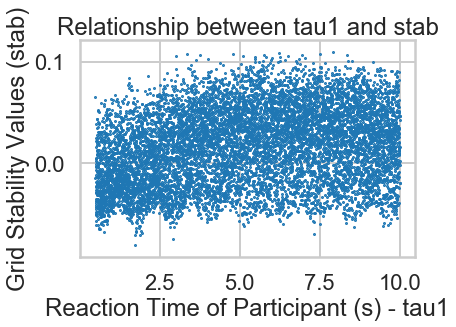

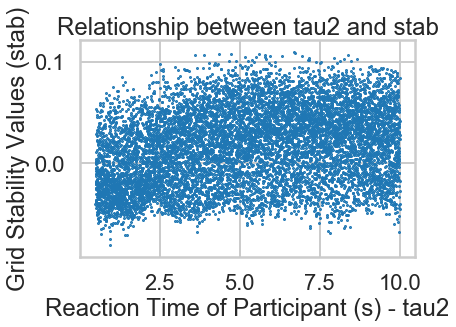

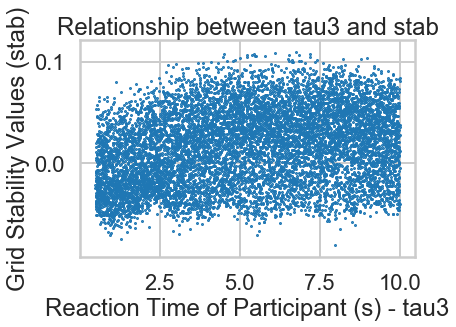

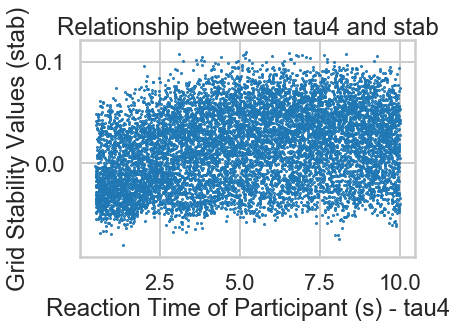

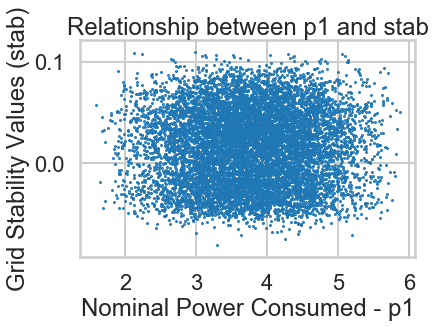

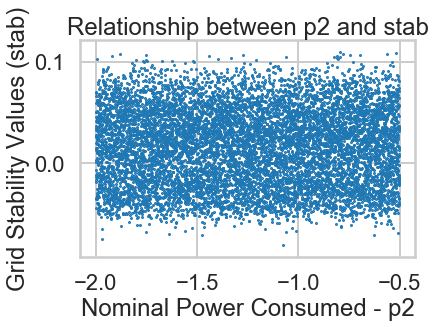

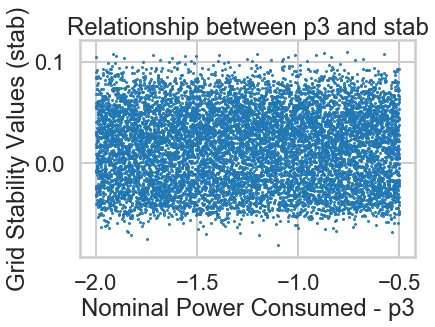

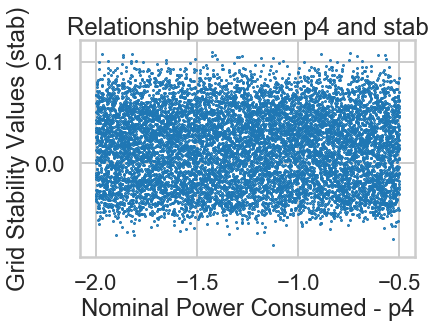

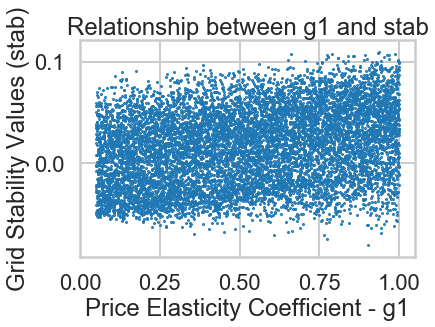

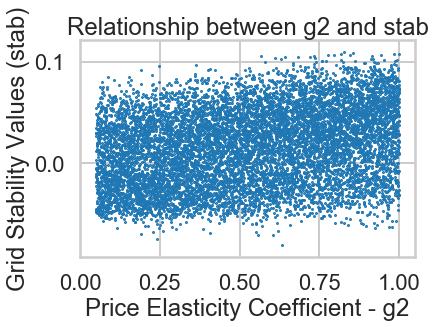

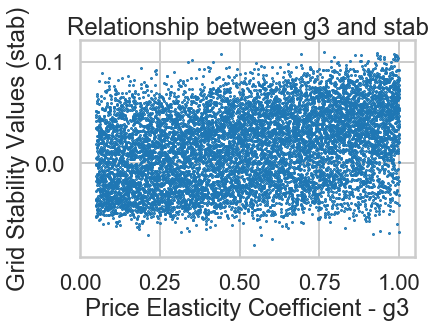

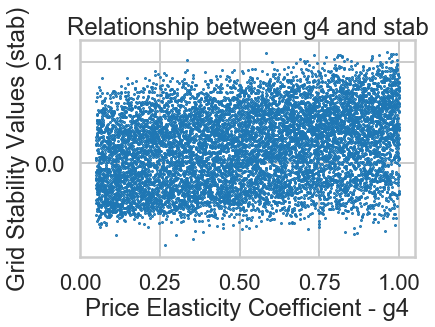

In [8]:
plt.scatter(df.tau1,df.stab,s=1)
plt.xlabel('Reaction Time of Participant (s) - tau1')
plt.ylabel('Grid Stability Values (stab)')
plt.title('Relationship between tau1 and stab')
plt.show()

plt.scatter(df.tau2,df.stab,s=1)
plt.xlabel('Reaction Time of Participant (s) - tau2')
plt.ylabel('Grid Stability Values (stab)')
plt.title('Relationship between tau2 and stab')
plt.show()

plt.scatter(df.tau3,df.stab,s=1)
plt.xlabel('Reaction Time of Participant (s) - tau3')
plt.ylabel('Grid Stability Values (stab)')
plt.title('Relationship between tau3 and stab')
plt.show()

plt.scatter(df.tau4,df.stab,s=1)
plt.xlabel('Reaction Time of Participant (s) - tau4')
plt.ylabel('Grid Stability Values (stab)')
plt.title('Relationship between tau4 and stab')
plt.show()

plt.scatter(df.p1,df.stab,s=1)
plt.xlabel('Nominal Power Consumed - p1')
plt.ylabel('Grid Stability Values (stab)')
plt.title('Relationship between p1 and stab')
plt.show()

plt.scatter(df.p2,df.stab,s=1)
plt.xlabel('Nominal Power Consumed - p2')
plt.ylabel('Grid Stability Values (stab)')
plt.title('Relationship between p2 and stab')
plt.show()

plt.scatter(df.p3,df.stab,s=1)
plt.xlabel('Nominal Power Consumed - p3')
plt.ylabel('Grid Stability Values (stab)')
plt.title('Relationship between p3 and stab')
plt.show()

plt.scatter(df.p4,df.stab,s=1)
plt.xlabel('Nominal Power Consumed - p4')
plt.ylabel('Grid Stability Values (stab)')
plt.title('Relationship between p4 and stab')
plt.show()

plt.scatter(df.g1,df.stab,s=1)
plt.xlabel('Price Elasticity Coefficient - g1')
plt.ylabel('Grid Stability Values (stab)')
plt.title('Relationship between g1 and stab')
plt.show()

plt.scatter(df.g2,df.stab,s=1)
plt.xlabel('Price Elasticity Coefficient - g2')
plt.ylabel('Grid Stability Values (stab)')
plt.title('Relationship between g2 and stab')
plt.show()

plt.scatter(df.g3,df.stab,s=1)
plt.xlabel('Price Elasticity Coefficient - g3')
plt.ylabel('Grid Stability Values (stab)')
plt.title('Relationship between g3 and stab')
plt.show()

plt.scatter(df.g4,df.stab,s=1)
plt.xlabel('Price Elasticity Coefficient - g4')
plt.ylabel('Grid Stability Values (stab)')
plt.title('Relationship between g4 and stab')
plt.show()


In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [10]:
import itertools
#https://stackoverflow.com/questions/48624071/run-regression-analysis-on-multiple-subsets-of-pandas-columns-efficiently
df1 = df.copy()
df1 = df1.drop(['p1','stabf'],axis=1) #remove p1 variable, which is a non-predictive variable (absolute sum of p2, p3, and p4)
df1.head()
# The function
def StepWise(columns, dependent):
    """ Takes the columns of a pandas dataframe, defines a dependent variable
        and returns all unique combinations of the remaining (independent) variables.

    """

    independent = columns.copy()
    independent.remove(dependent)

    lst1 = []
    lst2 = []
    for i in np.arange(1, len(independent)+1):
        #print(list(itertools.combinations(independent, i)))
        elem = list(itertools.combinations(independent, i))
        lst1.append(elem)
        lst2.extend(elem)

    combosIndependent = [list(elem) for elem in lst2]
    combosAll =  [[dependent, other] for other in combosIndependent]
    return(combosAll)

lExec = StepWise(columns = list(df1), dependent = 'stab')
print(type(lExec))
print(len(lExec))
print(lExec)


<class 'list'>
2047
[['stab', ['tau1']], ['stab', ['tau2']], ['stab', ['tau3']], ['stab', ['tau4']], ['stab', ['p2']], ['stab', ['p3']], ['stab', ['p4']], ['stab', ['g1']], ['stab', ['g2']], ['stab', ['g3']], ['stab', ['g4']], ['stab', ['tau1', 'tau2']], ['stab', ['tau1', 'tau3']], ['stab', ['tau1', 'tau4']], ['stab', ['tau1', 'p2']], ['stab', ['tau1', 'p3']], ['stab', ['tau1', 'p4']], ['stab', ['tau1', 'g1']], ['stab', ['tau1', 'g2']], ['stab', ['tau1', 'g3']], ['stab', ['tau1', 'g4']], ['stab', ['tau2', 'tau3']], ['stab', ['tau2', 'tau4']], ['stab', ['tau2', 'p2']], ['stab', ['tau2', 'p3']], ['stab', ['tau2', 'p4']], ['stab', ['tau2', 'g1']], ['stab', ['tau2', 'g2']], ['stab', ['tau2', 'g3']], ['stab', ['tau2', 'g4']], ['stab', ['tau3', 'tau4']], ['stab', ['tau3', 'p2']], ['stab', ['tau3', 'p3']], ['stab', ['tau3', 'p4']], ['stab', ['tau3', 'g1']], ['stab', ['tau3', 'g2']], ['stab', ['tau3', 'g3']], ['stab', ['tau3', 'g4']], ['stab', ['tau4', 'p2']], ['stab', ['tau4', 'p3']], ['stab'

In [11]:
n=0
allResults = pd.DataFrame(index=range(len(lExec)), columns=['Independent Variables','OLS R-Squared Value', 'OLS F-statistic','OLS AIC'])

for l in lExec:
   
    X1 = df1[l[1]]
    model = sm.OLS(df1['stab'], X1).fit()
    allResults['Independent Variables'][n]=l[1]
    allResults['OLS R-Squared Value'][n]=model.rsquared
    allResults['OLS F-statistic'][n]=model.fvalue
    allResults['OLS AIC'][n]=model.aic
    n=n+1
    
allResults


,Independent Variables,OLS R-Squared Value,OLS F-statistic,OLS AIC
0,[tau1],0.216148,2757.24,-38367.7
1,[tau2],0.222216,2856.76,-38445.4
2,[tau3],0.218109,2789.23,-38392.7
3,[tau4],0.217265,2775.44,-38381.9
4,[p2],0.135814,1571.42,-37392
5,[p3],0.137947,1600.06,-37416.7
6,[p4],0.141882,1653.24,-37462.5
7,[g1],0.218935,2802.75,-38403.3
8,[g2],0.223272,2874.23,-38459
9,[g3],0.229202,2973.26,-38535.6


In [12]:
Rsquaredresults = allResults.sort_values(by=['OLS R-Squared Value'], ascending=False)
Rsquaredresults.head(5)

,Independent Variables,OLS R-Squared Value,OLS F-statistic,OLS AIC
2046,"[tau1, tau2, tau3, tau4, p2, p3, p4, g1, g2, g...",0.46396,785.981,-42147.8
2035,"[tau1, tau2, tau3, tau4, p2, p3, p4, g1, g2, g3]",0.44653,805.974,-41829.8
2042,"[tau1, tau2, tau3, p2, p3, p4, g1, g2, g3, g4]",0.446041,804.383,-41821
2045,"[tau2, tau3, tau4, p2, p3, p4, g1, g2, g3, g4]",0.445351,802.141,-41808.5
2044,"[tau1, tau3, tau4, p2, p3, p4, g1, g2, g3, g4]",0.445242,801.786,-41806.6


In [13]:
Fstatresults = allResults.sort_values(by=['OLS F-statistic'], ascending=False)
Fstatresults.head(5)

,Independent Variables,OLS R-Squared Value,OLS F-statistic,OLS AIC
9,[g3],0.229202,2973.26,-38535.6
8,[g2],0.223272,2874.23,-38459
1,[tau2],0.222216,2856.76,-38445.4
7,[g1],0.218935,2802.75,-38403.3
2,[tau3],0.218109,2789.23,-38392.7


In [14]:
AICresults = allResults.sort_values(by=['OLS AIC'], ascending=True)
AICresults.head(5)

,Independent Variables,OLS R-Squared Value,OLS F-statistic,OLS AIC
2046,"[tau1, tau2, tau3, tau4, p2, p3, p4, g1, g2, g...",0.46396,785.981,-42147.8
2035,"[tau1, tau2, tau3, tau4, p2, p3, p4, g1, g2, g3]",0.44653,805.974,-41829.8
2042,"[tau1, tau2, tau3, p2, p3, p4, g1, g2, g3, g4]",0.446041,804.383,-41821
2045,"[tau2, tau3, tau4, p2, p3, p4, g1, g2, g3, g4]",0.445351,802.141,-41808.5
2044,"[tau1, tau3, tau4, p2, p3, p4, g1, g2, g3, g4]",0.445242,801.786,-41806.6


The code above iterates through all of the permutations of linear models possible given the independent variables tau1, tau2, tau3, tau4, p2, p3, p4, g1, g2, g3, and g4, and the dependent variable stab. The model which yields the highest Rsquared value and lowest AIC value is the one which includes all of the mentioned independent variables. The highest Rsquared value achieved is 0.46396, indicating that the linear model only accounts for 46.396% of the variation of the predicted stab value from the actual stab value.




Based on the linear and logistic regression results, I recommend using a logistic regression model using the independent variables tau1, tau2, tau3, tau4, p2, p3, p4, g1, g2, g3, and g4, to determine stabf, the binary stability value.